## 1. Import Library

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

## 2. Memuat Dataset

In [75]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Dataset/Dicoding Submission/Machine Learning Pemula/Bank Transaction Dataset for Fraud Detection/bank_transactions_data_edited.csv')

## 3. Exploratory Dataset Analyze (EDA)

In [76]:
# Ketahui Struktur Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [77]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [78]:
# Lihat statistik deskriptif dari dataset
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [79]:
df.sample()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
1054,TX001055,AC00151,382.07,2023-06-05 17:48:07,Credit,Omaha,D000318,21.97.154.92,M091,Branch,62.0,Doctor,147.0,1.0,10156.09,2024-11-04 08:08:17


In [80]:
# Ketahui Tipe transaksi yang ada
df['TransactionType'].unique()

array(['Debit', 'Credit', nan], dtype=object)

In [81]:
# Ketahui saluran transaksi
df['Channel'].unique()

array(['ATM', 'Online', 'Branch', nan], dtype=object)

In [82]:
# Ketahui jumlah percobaan login yang tersedia
df['LoginAttempts'].unique()

array([ 1.,  3.,  5., nan,  2.,  4.])

In [83]:
# Ketahui nominal transaksi tertinggi dan terendah untuk menentukan apakah data perlu discaling atau tidak
print("Transaksi Tertinggi", df['TransactionAmount'].max())
print("Transaksi Terendah", df['TransactionAmount'].min())

Transaksi Tertinggi 1919.11
Transaksi Terendah 0.26


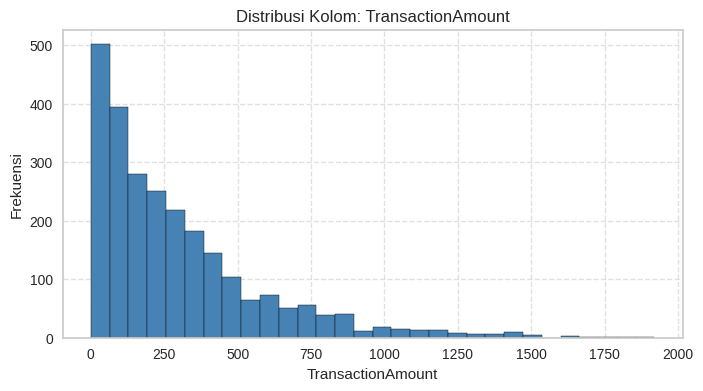

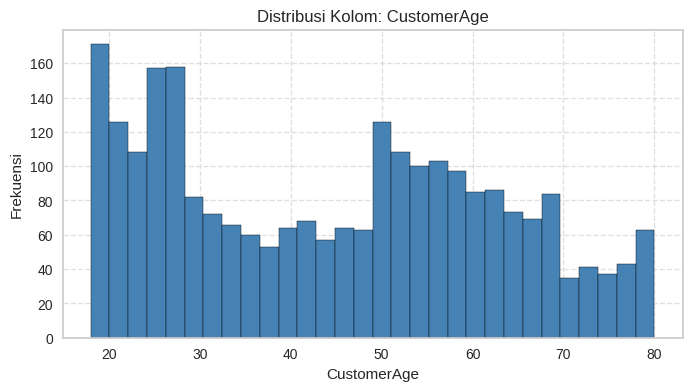

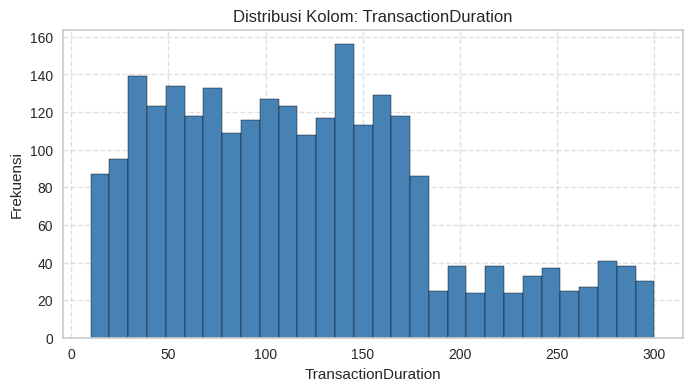

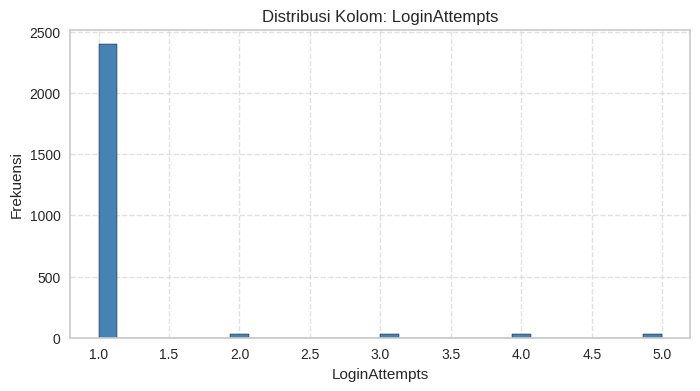

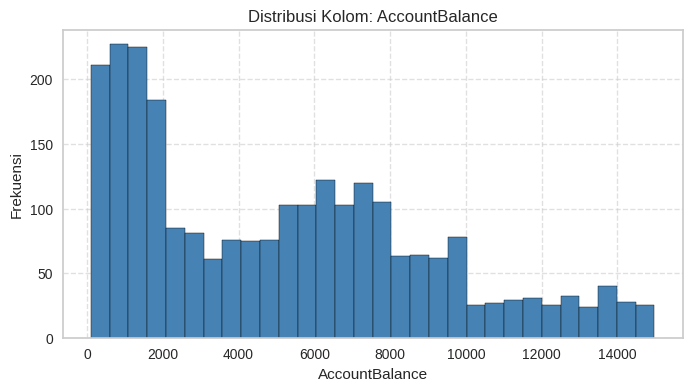

In [84]:
# Histogram kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black')
    plt.title(f'Distribusi Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

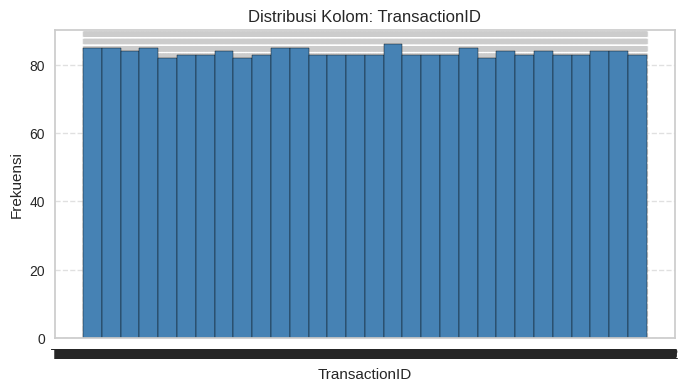

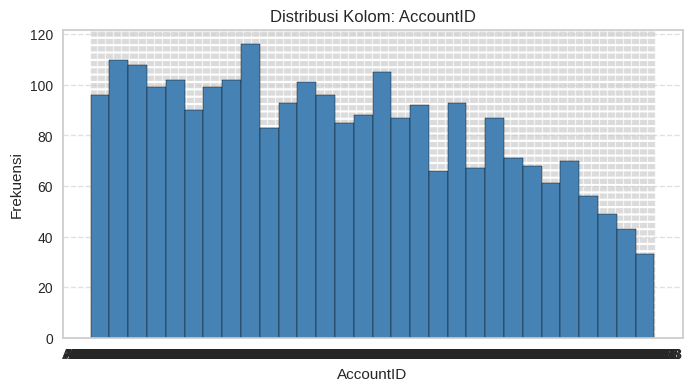

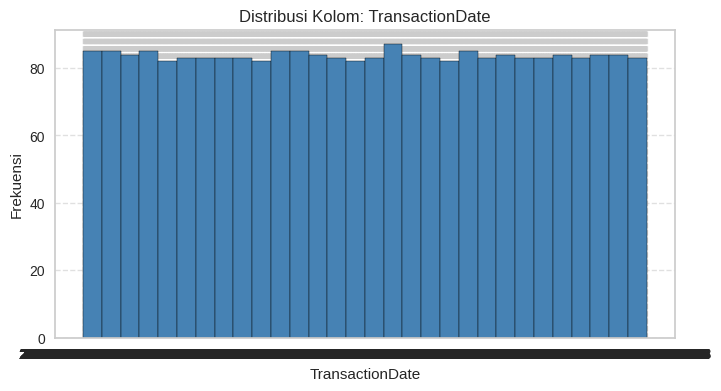

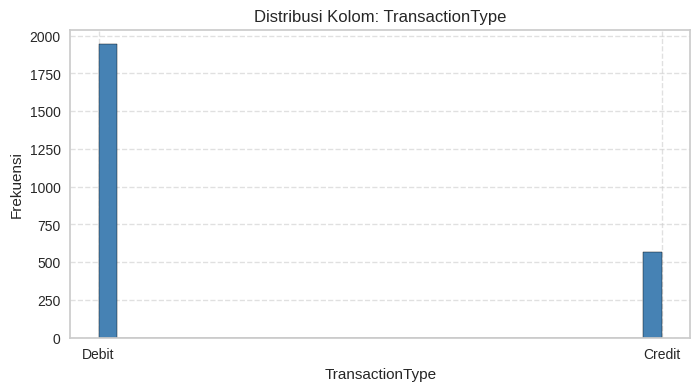

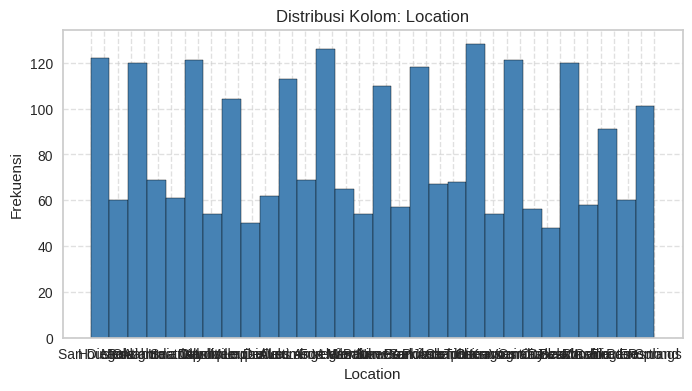

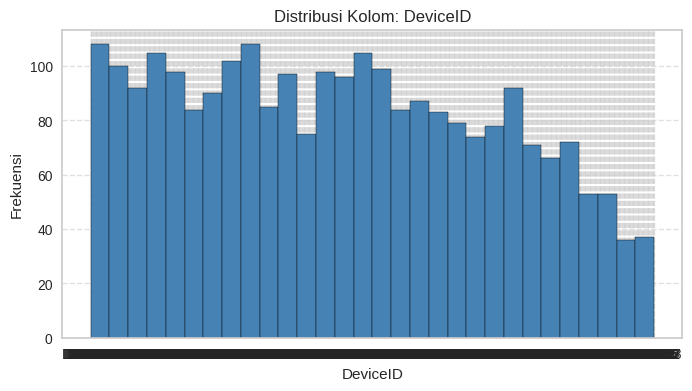

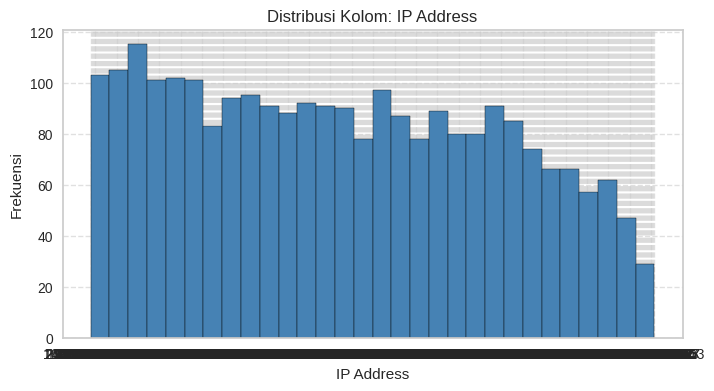

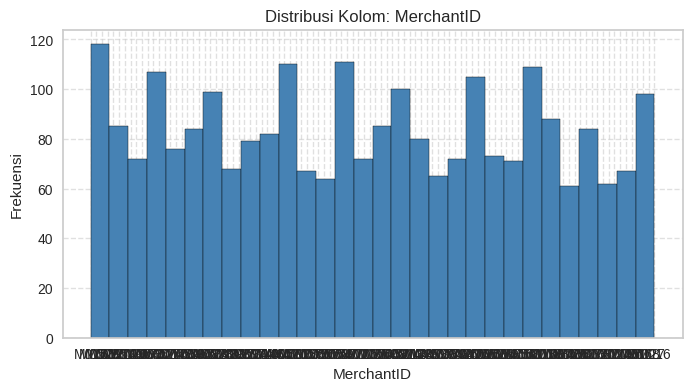

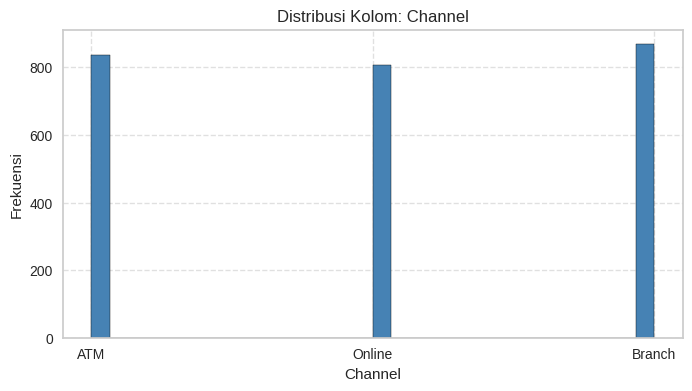

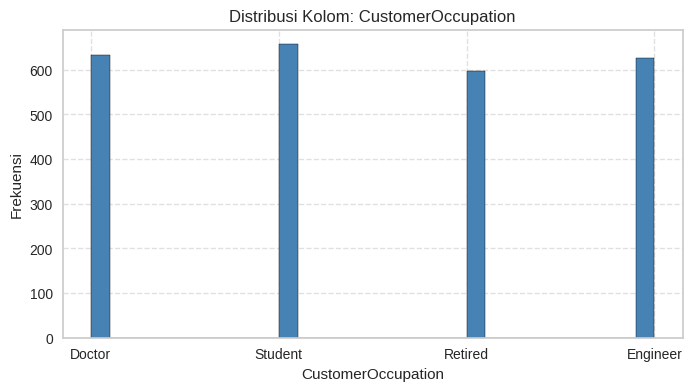

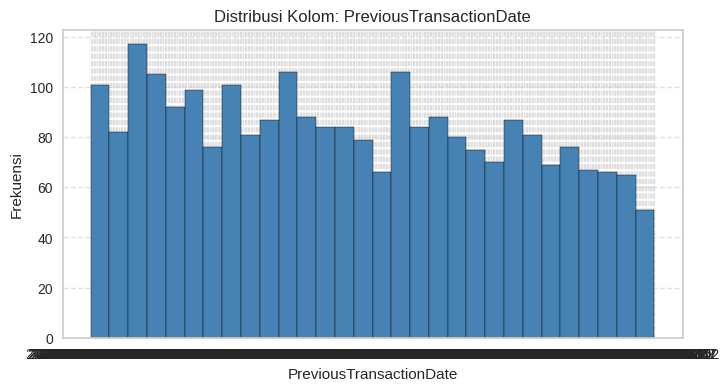

In [85]:
# Histogram kolom kategorik
categoric_cols = df.select_dtypes(include=['object']).columns

for col in categoric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black')
    plt.title(f'Distribusi Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [88]:
# Ubah 'TransactionDate' dan 'PreviousTransactionDate' menjadi `datetime` untuk mempermudah analisis transaksi berdasarkan waktu
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'], errors='coerce')
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'], errors='coerce')

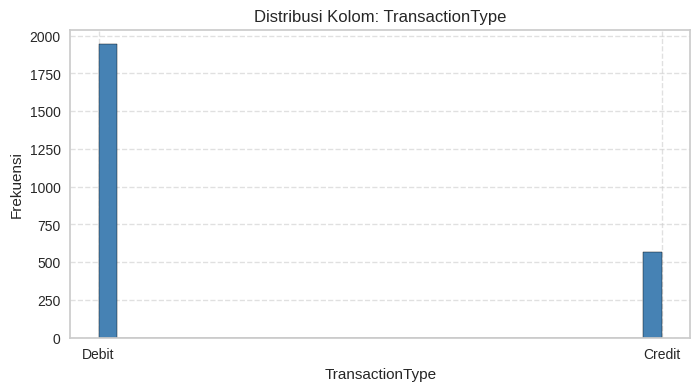

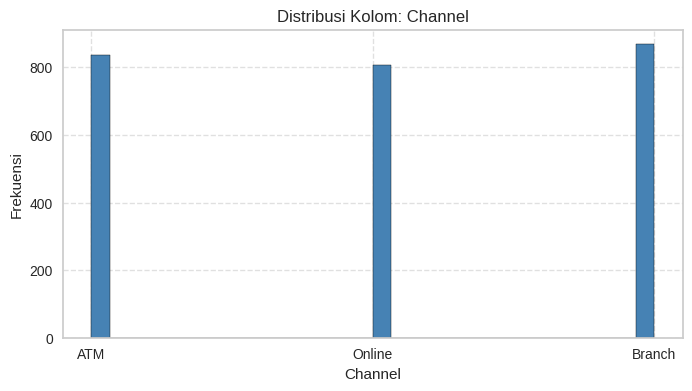

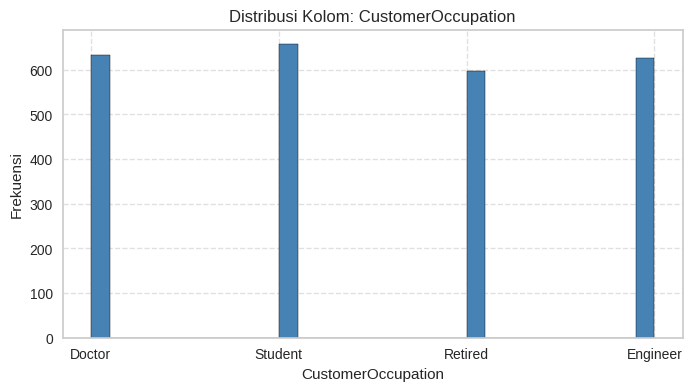

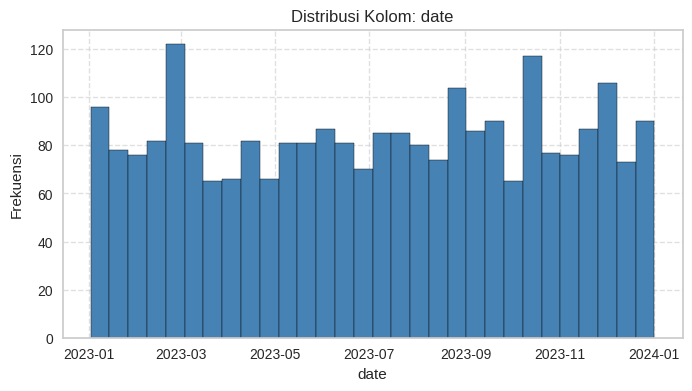

In [90]:
# Histogram kolom kategorik
df['date'] = df['TransactionDate'].dt.date # Ubah menjadi penanggalan tanpa jam
categoric_cols = ['TransactionType', 'Channel', 'CustomerOccupation', 'date']

for col in categoric_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(df[col].dropna(), bins=30, color='steelblue', edgecolor='black')
    plt.title(f'Distribusi Kolom: {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2508 non-null   object        
 1   AccountID                2516 non-null   object        
 2   TransactionAmount        2511 non-null   float64       
 3   TransactionDate          2509 non-null   datetime64[ns]
 4   TransactionType          2507 non-null   object        
 5   Location                 2507 non-null   object        
 6   DeviceID                 2507 non-null   object        
 7   IP Address               2517 non-null   object        
 8   MerchantID               2514 non-null   object        
 9   Channel                  2510 non-null   object        
 10  CustomerAge              2519 non-null   float64       
 11  CustomerOccupation       2514 non-null   object        
 12  TransactionDuration      2511 non-

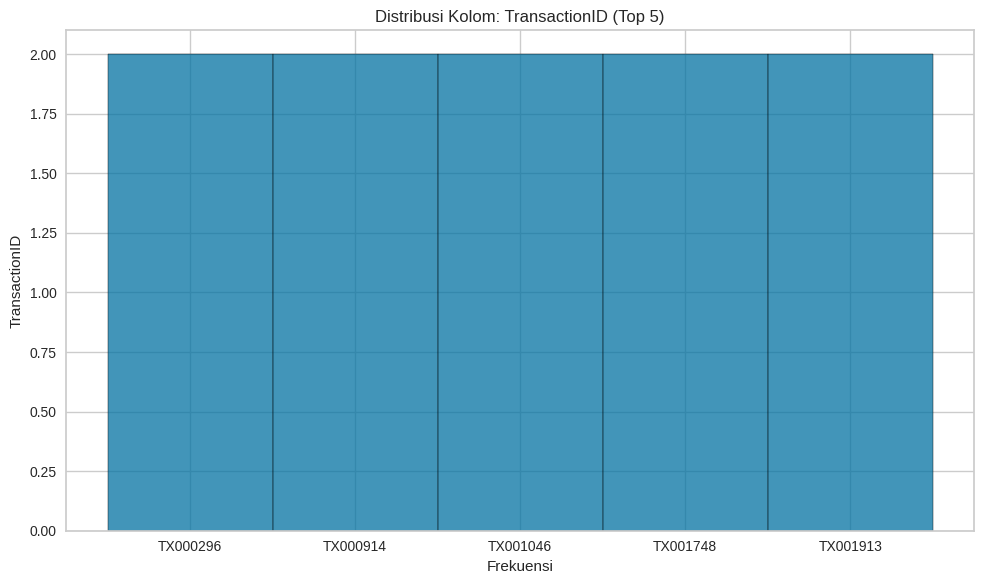

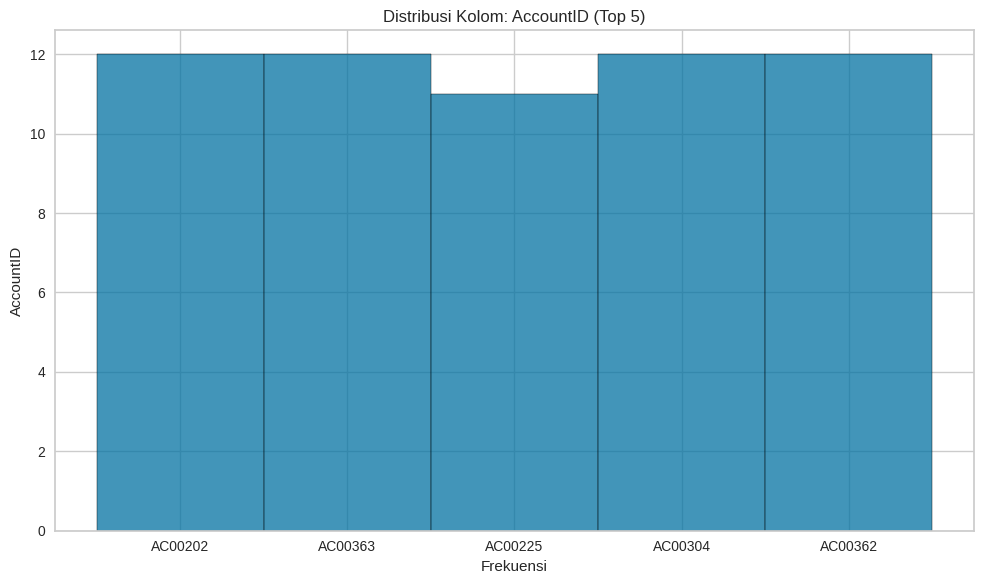

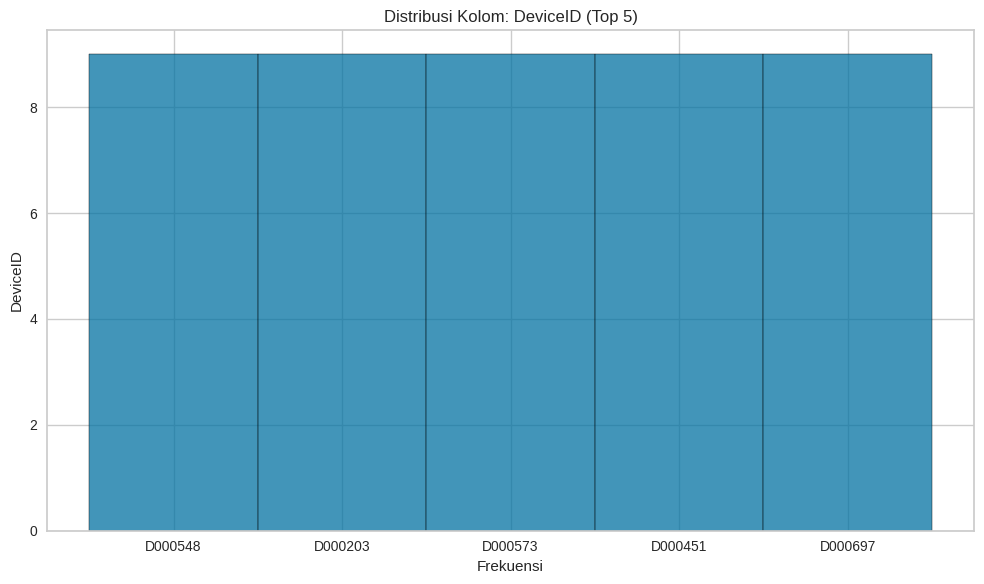

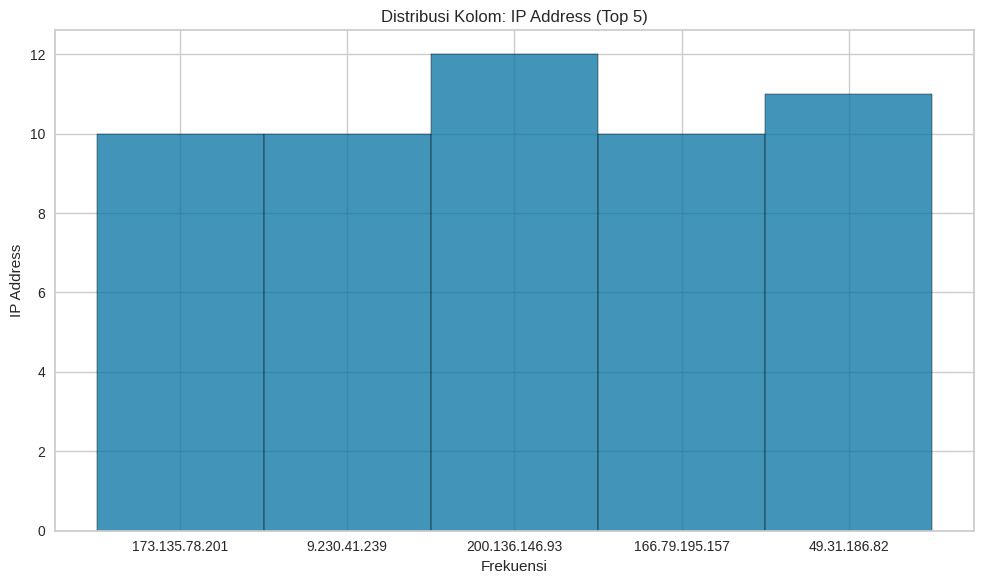

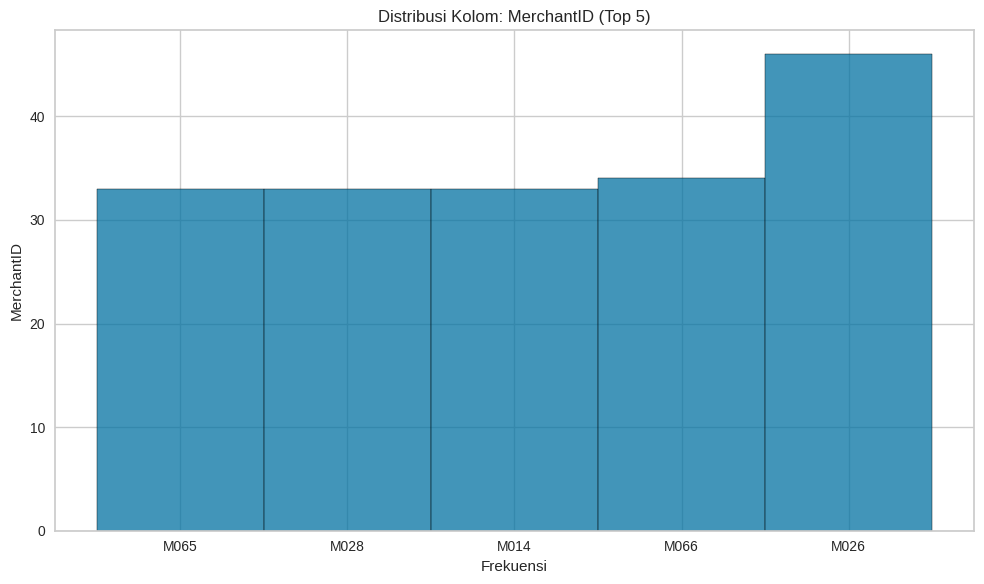

In [98]:
# Loop untuk tiap kolom kategorik
categoric_cols2 = ['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID']

for col in categoric_cols2:
    plt.figure(figsize=(10, 6))
    top_categories = df[col].value_counts().nlargest(5).index
    filtered_data = df[df[col].isin(top_categories)]
    sns.histplot(data=filtered_data, x=col, discrete=True)
    plt.title(f"Distribusi Kolom: {col} (Top 5)")
    plt.xlabel("Frekuensi")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

In [71]:
# Ketahui Rentang waktu data yang disediakan dataset
print("Data Terlama: ", df['TransactionDate'].min())
print("Data Terbaru: ", df['TransactionDate'].max())

Data Terlama:  2023-01-02 16:00:06
Data Terbaru:  2024-01-01 18:21:50


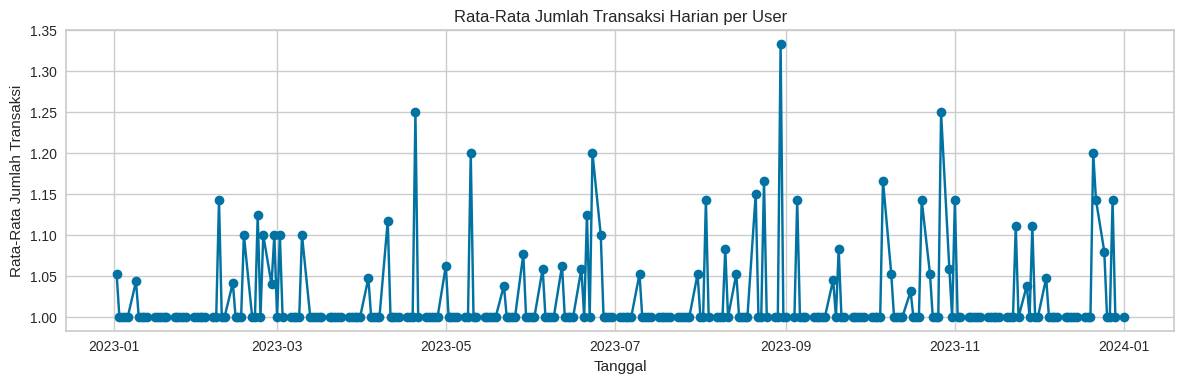

In [51]:
# Rata Rata Transaksi per user per hari
daily_user = df.groupby(['AccountID', 'date']).size().reset_index(name='count')
daily_avg = daily_user.groupby('date')['count'].mean().reset_index()

plt.figure(figsize=(12,4))
plt.plot(daily_avg['date'], daily_avg['count'], marker='o', linestyle='-')
plt.title('Rata-Rata Jumlah Transaksi Harian per User')
plt.xlabel('Tanggal')
plt.ylabel('Rata-Rata Jumlah Transaksi')
plt.tight_layout()
plt.show()

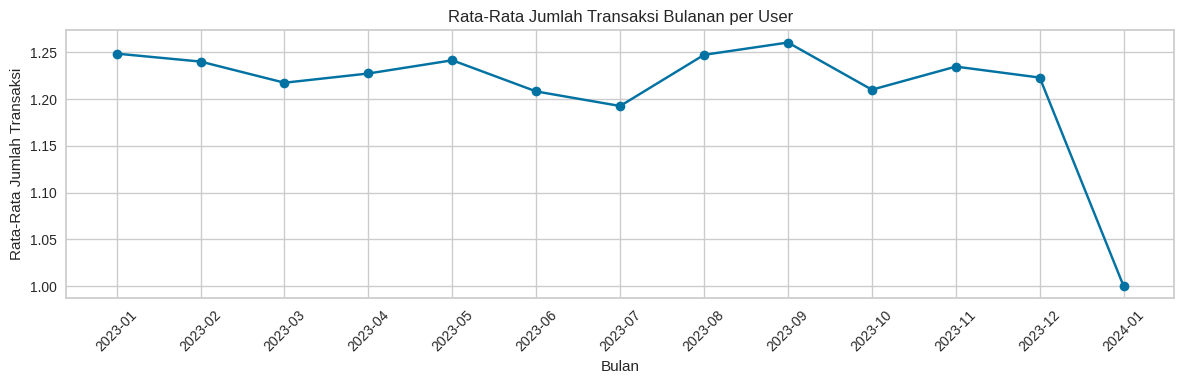

In [52]:
# Rata-Rata transaksi per user per bulan
df['month'] = df['TransactionDate'].dt.to_period('M')
month_user = df.groupby(['AccountID', 'month']).size().reset_index(name='count')
month_avg = month_user.groupby('month')['count'].mean().reset_index()

plt.figure(figsize=(12,4))
plt.plot(month_avg['month'].astype(str), month_avg['count'], marker='o', linestyle='-')
plt.title('Rata-Rata Jumlah Transaksi Bulanan per User')
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Jumlah Transaksi')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: >

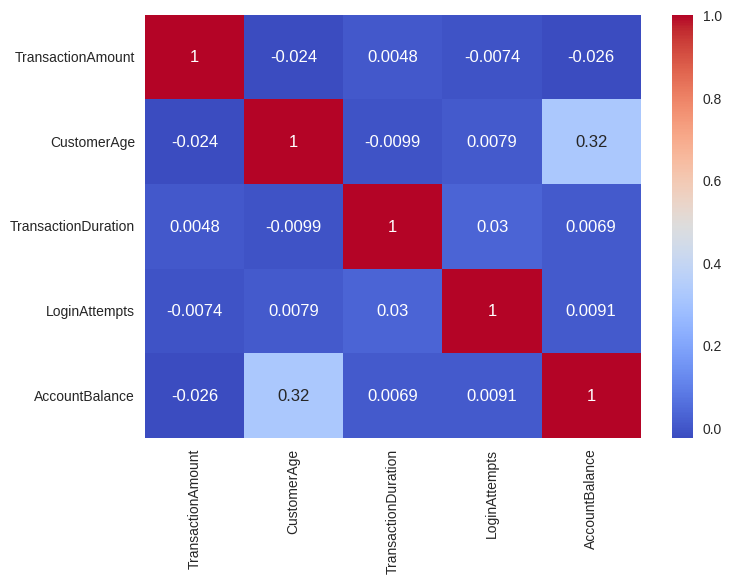

In [57]:
# Matriks korelasi antar feature numerik
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

## 5. Pembersihan Data

In [99]:
# Ketahui jumlah missing value dari dataset
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [100]:
# Ketahui jumlah duplikasi data pada dataset
print("Sebelum: ", df.duplicated().sum())

# Hapus data duplikat
df = df.drop_duplicates()

# Setelah hapus data duplikat
print("Setelah: ", df.duplicated().sum())

Sebelum:  21
Setelah:  0


In [101]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

In [102]:
# Analisis jumlah dan presentase outlier
def detect_outliers_iqr_batch(df, columns):
    results = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        count = len(outliers)
        percent = (count / len(df)) * 100

        results[col] = {
            "count": count,
            "percent": percent,
            "outliers": outliers
        }
    return results

# Pastikan kolom yang ingin di cek merupakan kolom numerik
columns_to_check = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
outlier_results = detect_outliers_iqr_batch(df, columns_to_check)

for col,res in outlier_results.items():
  print(f"Outlier {col}: {res['count']} data ({res['percent']:.2f}%)")

Outlier TransactionAmount: 112 data (4.45%)
Outlier CustomerAge: 0 data (0.00%)
Outlier TransactionDuration: 0 data (0.00%)
Outlier LoginAttempts: 120 data (4.77%)
Outlier AccountBalance: 0 data (0.00%)


In [103]:
# Penanganan outlier


## 6. Pre-processing Data

In [104]:
# Encoding feature kategorik
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

## 7. Menentukan Jumlah Cluster

## 8. Membangun Model Clustering

## 9. Penilaian (Opsional)

### Feature Selection

### Penggunaan Algoritma Lain

### Mencapai nilai Silhoutte 0.70